In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
data = pd.read_csv("H:/data/inter/task1.csv")

In [3]:
# data explore
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Check the coloumns name 
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
# Show data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Show null 
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
# Print the shape of given data
data.shape

(25, 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A0C575E08>,
      dtype=object)

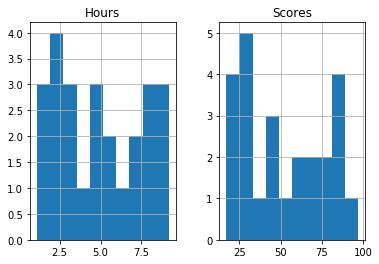

In [8]:
# Plot the histogrom for data
data.hist()

Text(27.125, 0.5, 'Scores')

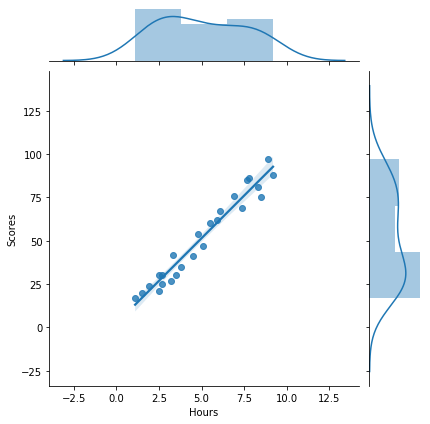

In [9]:
# Plot jointplot for hours and scores values
sns.jointplot(x = 'Hours',y = 'Scores',data = data,kind = 'reg')
plt.xlabel("Hours")
plt.ylabel("Scores")

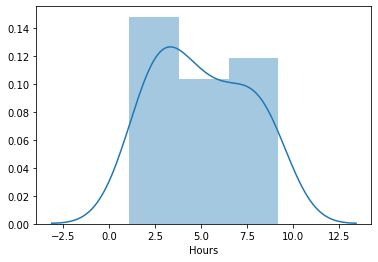

In [10]:
# distribution plot for hours data
sns.distplot(data['Hours'])

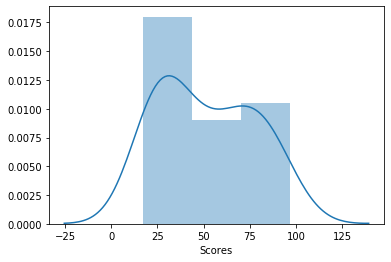

In [11]:
# distribution plot for scores data
sns.distplot(data['Scores'])

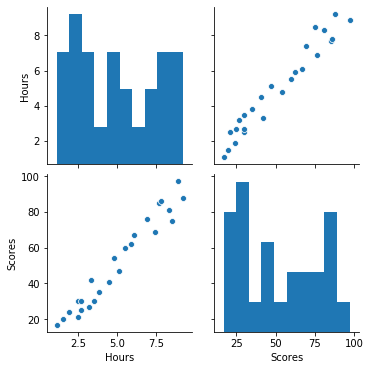

In [12]:
# pairplot fro the given data
sns.pairplot(data)

In [13]:
# Train the model 
x = data.iloc[:,:1].values
y = data.iloc[:,1:2].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 42)
print("Shape of x  train data :",x_train.shape)
print("Shape of y train data :",y_train.shape)
print("Shape of x test data :",x_test.shape)
print("Shape of y test data :",y_test.shape)

Shape of x  train data : (17, 1)
Shape of y train data : (17, 1)
Shape of x test data : (8, 1)
Shape of y test data : (8, 1)


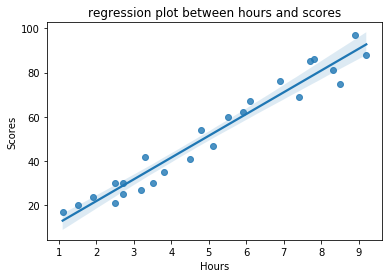

In [14]:
# regression plot between hours and score data 
sns.regplot(x,y)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("regression plot between hours and scores")
plt.show()

In [15]:
# Here apply liner regression algorithms 
from sklearn.linear_model import LinearRegression
mdl = LinearRegression()
mdl.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# For train data
from sklearn.metrics import mean_squared_error
predict  = mdl.predict(x_train)
print("Mean Squared Error for training data : ",round(mean_squared_error(predict,y_train),3))

Mean Squared Error for training data :  32.952


In [17]:
# For test data
predict  = mdl.predict(x_test)
print("MeanSquared Error for test data : ",round(mean_squared_error(predict,y_test),3))

MeanSquared Error for test data :  23.474


In [18]:
# concat between predict value and actual value

pre =pd.Series(predict.ravel())
y_test = pd.Series(y_test.ravel())
concat  = [pre,y_test]
z = pd.concat(concat,axis=1,keys= ['predict','actual'])
z.head()

,predict,actual
0,83.708369,81
1,27.016950,30
2,27.016950,21
3,70.024234,76
4,60.249851,62


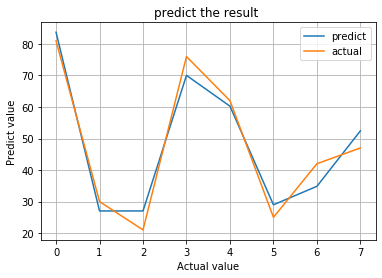

In [19]:
# plot the graph actual and predict value 

z.plot()
plt.grid()
plt.xlabel('Actual value')
plt.ylabel("Predict value")
plt.title("predict the result ")
plt.show()

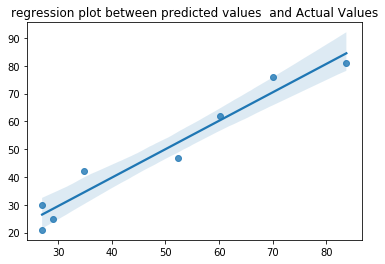

In [20]:
sns.regplot(predict,y_test)
plt.title("regression plot between predicted values  and Actual Values")
plt.show()

# main question

# What will be predicted score if a student study for 9.25 hrs in a day?


In [21]:
z = mdl.predict([[9.25]])
print(f' If a student study for 9.25 hrs in a day so predicted Score {z}')

 If a student study for 9.25 hrs in a day so predicted Score [[92.99403253]]
